In [140]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
import numpy as np

mpl.rcParams['figure.figsize'] = (16,8)
mpl.rcParams['font.size'] = (16)

In [141]:
from locale import atof
    
def parseNdValue(x):
    x = x.replace(',', '.')
    if (x == 'n/d'):
        return '0.0'
    else:
        return x
def parseMValue(x):

    if ('M' in x):
        return str(float(x.replace('M','').replace(',', '.')) *  1000000)
    else:
        return x

def parsPercentValue(x):
    return x.replace('%', '').replace(',', '.')

def data_separator(vetor, n_steps):
    X_novo, y_novo = [], []
    for i in range(n_steps, vetor.shape[0]):
        X_novo.append(list(vetor.loc[i-n_steps:i-1]))
        y_novo.append(vetor.loc[i])
    X_novo, y_novo = np.array(X_novo), np.array(y_novo)
    return X_novo, y_novo

In [142]:
#Lendo csv
data = pd.read_csv("./itsa4-historico.csv", delimiter=',')

In [143]:
# Muda o tipo dos dados
data['ABERTURA'] = data['ABERTURA'].apply(parseNdValue).map(atof)
data['FECHAMENTO'] = data['FECHAMENTO'].apply(parseNdValue).map(atof)
data['VARIAÇÃO'] = data['VARIAÇÃO'].apply(parseNdValue).map(atof)
data['MÍNIMO'] = data['MÍNIMO'].apply(parseNdValue).map(atof)
data['MÁXIMO'] = data['MÁXIMO'].apply(parseNdValue).map(atof)
data['VOLUME'] = data['VOLUME'].apply(parseMValue).map(atof)
data["DATA"] = pd.to_datetime(data["DATA"], format='%d/%m/%Y')
data = data.sort_values(by="DATA")
data = data.reset_index(drop=True)
data['DATA'] = pd.to_datetime(data['DATA']).astype('int64')

/tmp/ipykernel_5047/2243168930.py:11: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  data['DATA'] = pd.to_datetime(data['DATA']).astype('int64')


In [144]:
data = data[['DATA','FECHAMENTO']]
data.head()

,DATA,FECHAMENTO
0,1580688000000000000,11.05
1,1580774400000000000,11.08
2,1580860800000000000,11.14
3,1580947200000000000,11.03
4,1581033600000000000,11.00


<AxesSubplot:xlabel='DATA', ylabel='FECHAMENTO'>

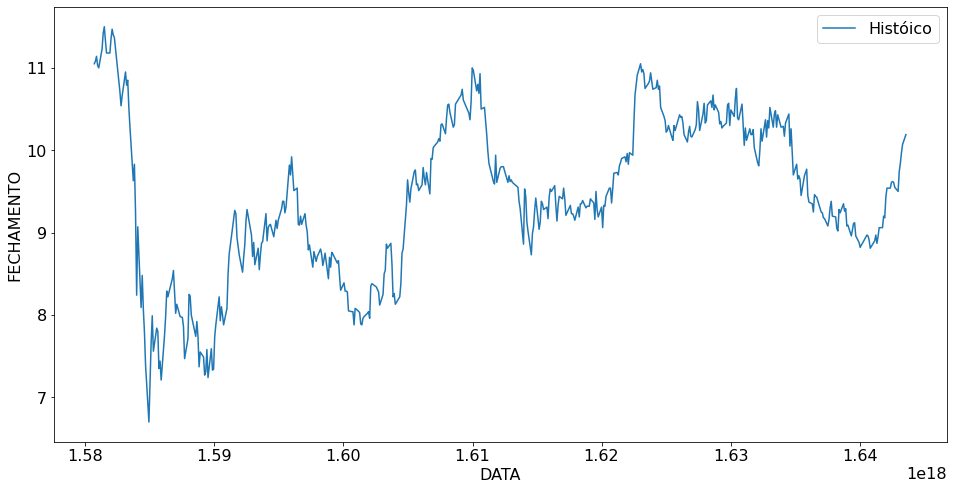

In [145]:
#Gráfico
sns.lineplot(x='DATA', y='FECHAMENTO', data=data, label='Históico')

In [146]:
#Normalização dos dados
sc = StandardScaler()
sc.fit(data)
StandardScaler(copy=True, with_mean=True, with_std=True)
scaled_data = sc.transform(data)

In [147]:
#Separando dados
x = scaled_data[:,0]
y = scaled_data[:,1]

Text(0, 0.5, 'Fechamento')

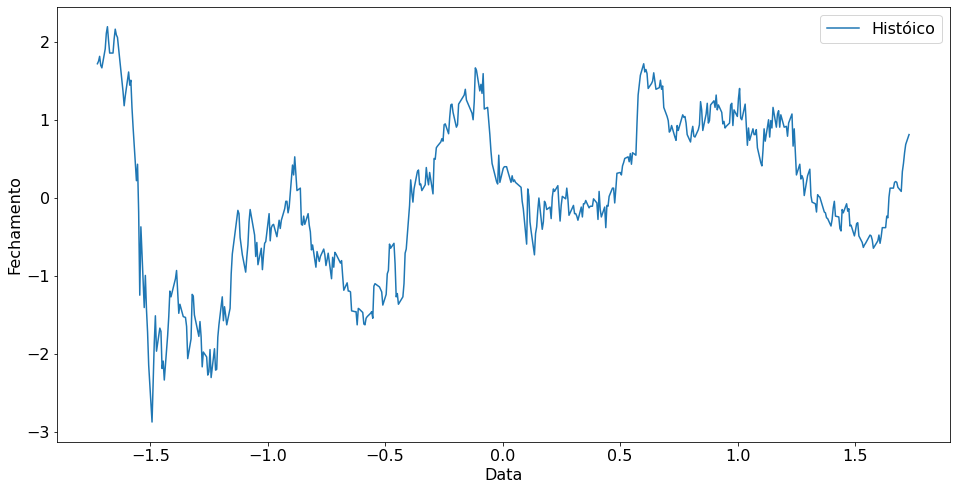

In [148]:
#Gráfico
sns.lineplot(x=x, y=y, label='Históico')
plt.xlabel('Data')
plt.ylabel('Fechamento')

In [174]:
len_train = int(len(data)*0.80)
len_test = len(data) - len_train

In [175]:
print('Linhas de treino:', len_train,' Linhas de teste:', len_test)

Linhas de treino: 396  Linhas de teste: 99


In [150]:
x_train = x[0:len_train]
y_train = y[0:len_train]

In [151]:
x_test = x[len_train:len(data)]
y_test = y[len_train:len(data)]

In [152]:
new_x_train, new_y_train = data_separator(pd.DataFrame(y_train)[0] , 1)

In [153]:
new_x_train[0:5]

array([[1.71535557],
       [1.7469983 ],
       [1.81028376],
       [1.69426042],
       [1.66261769]])

In [154]:
new_y_train[0:5]

array([1.7469983 , 1.81028376, 1.69426042, 1.66261769, 1.90521195])

In [155]:
new_x_test, new_y_test = data_separator(pd.DataFrame(y_test)[0] , 1)

In [156]:
new_x_train[0:5]

array([[1.71535557],
       [1.7469983 ],
       [1.81028376],
       [1.69426042],
       [1.66261769]])

In [157]:
new_y_train[0:5]

array([1.7469983 , 1.81028376, 1.69426042, 1.66261769, 1.90521195])

Text(0, 0.5, 'Fechamento')

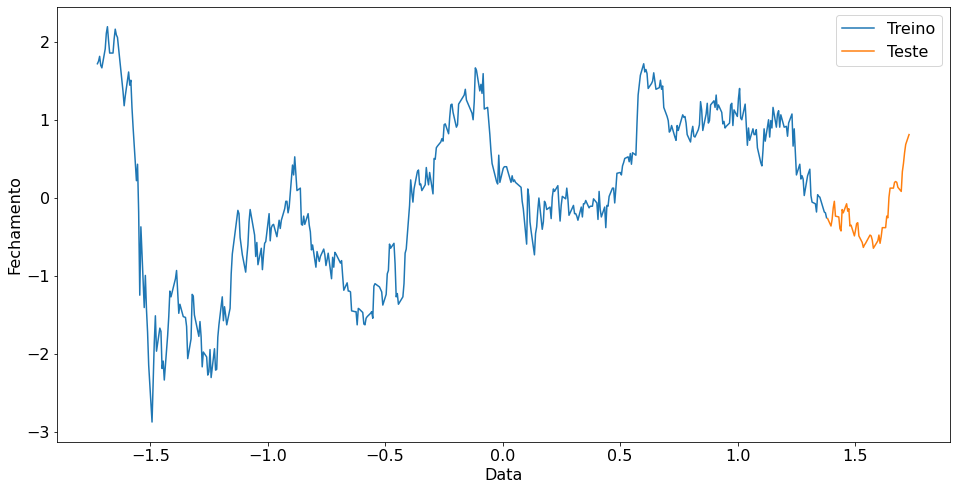

In [158]:
sns.lineplot(x=x_train, y=y_train, label='Treino')
sns.lineplot(x=x_test, y=y_test, label='Teste')
plt.xlabel('Data')
plt.ylabel('Fechamento')

In [159]:
regressor = Sequential()

In [160]:
#Criando neurônios (1 neuronio se liga a 1 saida)
#Ones -> Peso 1 (Multiplica o valor de entrada por um peso para chegar no valor de saida)
#Valor somado
#input_dim -> dimensão da camada de entrada
#Formando asism z = Wx + b ou y = aX + b
regressor.add(Dense(8, input_dim=1, kernel_initializer='ones', activation='linear', use_bias=False))
regressor.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor.add(Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False))
#mean_squad_error -> Mede diferença da estimativa
regressor.compile(loss='mean_squared_error', optimizer='adam')

regressor.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 8)                 8         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                512       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 64        
Total params: 584
Trainable params: 584
Non-trainable params: 0
_________________________________________________________________


In [161]:
# regressor.fit(x_train, y_train, epochs=500)
regressor.fit(new_x_train, new_y_train, epochs=100)

Epoch 1/100
14/14 [==============================] - 0s 572us/step - loss: 1.0647
Epoch 2/100
14/14 [==============================] - 0s 555us/step - loss: 0.9596
Epoch 3/100
14/14 [==============================] - 0s 557us/step - loss: 0.8178
Epoch 4/100
14/14 [==============================] - 0s 638us/step - loss: 0.6412
Epoch 5/100
14/14 [==============================] - 0s 693us/step - loss: 0.4180
Epoch 6/100
14/14 [==============================] - 0s 525us/step - loss: 0.2293
Epoch 7/100
14/14 [==============================] - 0s 595us/step - loss: 0.1030
Epoch 8/100
14/14 [==============================] - 0s 513us/step - loss: 0.0593
Epoch 9/100
14/14 [==============================] - 0s 584us/step - loss: 0.0538
Epoch 10/100
14/14 [==============================] - 0s 518us/step - loss: 0.0538
Epoch 11/100
14/14 [==============================] - 0s 614us/step - loss: 0.0538
Epoch 12/100
14/14 [==============================] - 0s 546us/step - loss: 0.0537
Epoch 13/100


In [162]:
# y_predict = regressor.predict(x_train)
y_predict = regressor.predict(new_x_train)

In [164]:
data.shape

(495, 2)

In [165]:
y_predict.shape

(444, 1)

<AxesSubplot:xlabel='DATA', ylabel='0'>

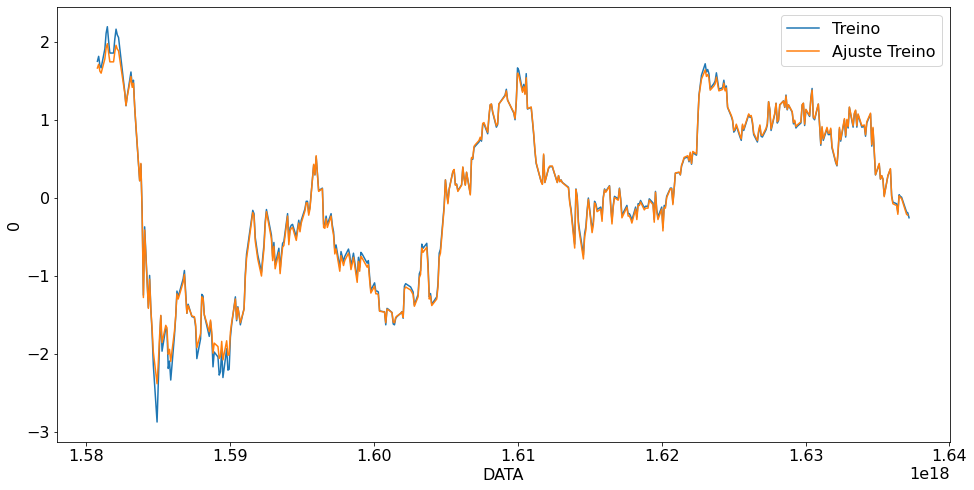

In [166]:
# sns.lineplot(x=x_train, y=y_train, label='Treino')
# sns.lineplot(x=x_train, y=y_predict[:,0], label='Ajuste Treino')
sns.lineplot(x='DATA', y=new_y_train, data=data[1:len_train], label='Treino')
sns.lineplot(x='DATA', y=pd.DataFrame(y_predict)[0], data=data[1:len_train], label='Ajuste Treino')

In [170]:
# aux_data = { 'DATA': x_train, 'FECHAMENTO': y_predict[:,0]}
# aux_data = { 'DATA': new_x_train, 'FECHAMENTO': y_predict[:,0]}
# result = pd.DataFrame(data=aux_data)

ValueError: Data must be 1-dimensional

In [ ]:
# trans_result = sc.inverse_transform(result)

In [ ]:
# trans_result = pd.DataFrame(trans_result)
# trans_result.columns = ['DATA', 'FECHAMENTO']

<AxesSubplot:xlabel='DATA', ylabel='FECHAMENTO'>

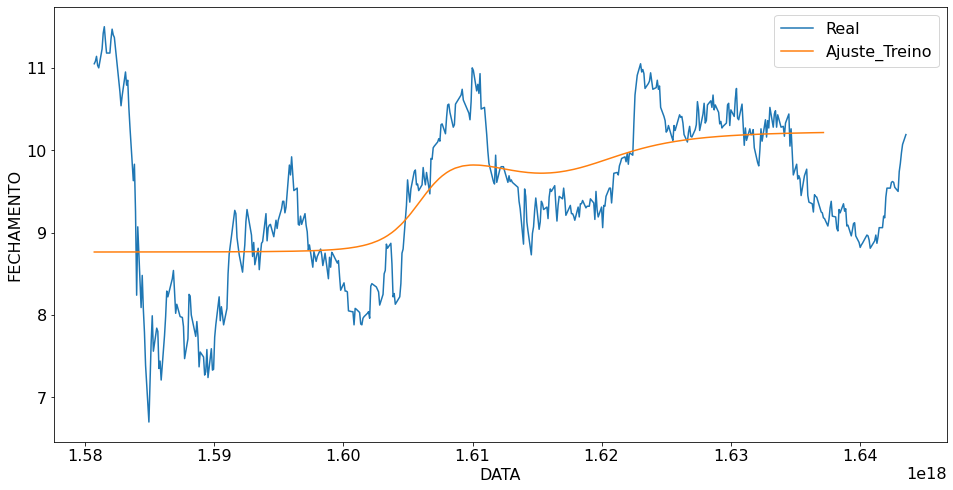

In [ ]:
# sns.lineplot(x='DATA', y='FECHAMENTO', data=data, label='Real')
# sns.lineplot(x='DATA', y='FECHAMENTO', data=trans_result, label='Ajuste_Treino')

In [ ]:
# y_predict_test = regressor.predict(x_test)
# aux_data = { 'DATA': x_test, 'FECHAMENTO': y_predict_test[:,0]}
y_predict_test = regressor.predict(new_x_test)
# test_result = pd.DataFrame(data=aux_data)

In [ ]:
# trans_test_result = sc.inverse_transform(test_result)

In [ ]:
# trans_test_result = pd.DataFrame(trans_test_result)
# trans_test_result.columns = ['DATA', 'FECHAMENTO']

In [178]:
len_test

99

In [179]:
len_train

396

In [177]:
# sns.lineplot(x='DATA', y='FECHAMENTO', data=data, label='Real')
# sns.lineplot(x='DATA', y='FECHAMENTO', data=trans_test_result, label='Teste')
sns.lineplot(x='DATA', y=new_y_train, data=data[1:len_train], label='Treino')
sns.lineplot(x='DATA', y=pd.DataFrame(y_predict)[0], data=data[1:len_train], label='Ajuste Treino')

sns.lineplot(x='DATA', y=new_y_test, data=data[len_test:], label='Ajuste Treino')

ValueError: Length of ndarray vectors must match length of `data` when both are used, but `data` has length 395 and the vector passed to `y` has length 444.